In [1]:
from specim_test.specim.specfuncs import spec2d
from astropy.io import fits as pf
import numpy as np
import matplotlib.pyplot as plt
from specim.specfuncs import spec1d
import glob

In [2]:
#infile = '../galaxy_spectra/LRIS_red_data_201213/keck_lris_red_D/Science/spec2d_r201213_0035-MG0751+2716_LRISr_2020Dec13T124808.006.fits'
infile = '../galaxy_spectra/LRIS_data/LRIS_red_data_201213/keck_lris_red_D/Science/spec2d_r201213_0034-MG0751+2716_LRISr_2020Dec13T120424.557.fits'

In [3]:
spec = spec2d.Spec2d(infile, hext=12, xtrim=[25, 200]) #[60, 170]


Loading file ../galaxy_spectra/LRIS_data/LRIS_red_data_201213/keck_lris_red_D/Science/spec2d_r201213_0034-MG0751+2716_LRISr_2020Dec13T120424.557.fits
-----------------------------------------------
Read in 2-dimensional spectrum from ../galaxy_spectra/LRIS_data/LRIS_red_data_201213/keck_lris_red_D/Science/spec2d_r201213_0034-MG0751+2716_LRISr_2020Dec13T120424.557.fits (HDU=12)
The input dataset was trimmed
 xrange: 25:551.  yrange: 0:4096
Final data dimensions (x y): 526 x 4096

Dispersion axis:              x
N_pixels along dispersion axis: 526



In [6]:
spec.set_dispaxis('y')
spec.szap(use_skymod=True, outfile='MG0751_r34_clean.fits') 


Old value of dispaxis: x

Dispersion axis:              y
N_pixels along dispersion axis: 4096



pypeit generated sky model will be used for sky subtraction


From this point sky subtracted data will be used
 Spectrum Start:     0.00
 Spectrum End:     4095.00
 Dispersion (1st pixel):   1.00
 Dispersion (average):      1.00


From now cosmic ray rejected data will be used

 Wrote szapped data to MG0751_r34_clean.fits


In [5]:
spec.szap(use_skymod=True) #outfile='mask_test.fits', 


pypeit generated sky model will be used for sky subtraction


From this point sky subtracted data will be used
 Spectrum Start:     0.00
 Spectrum End:     4095.00
 Dispersion (1st pixel):   1.00
 Dispersion (average):      1.00


From now cosmic ray rejected data will be used

 Wrote szapped data to None


Dispersion : 0.800000
Found 125 NaNs in the two-dimensional spectrum

sky subtracted and cosmic ray rejected data has been resampled in place of the coordinateds whcih rectify the tilted wave image


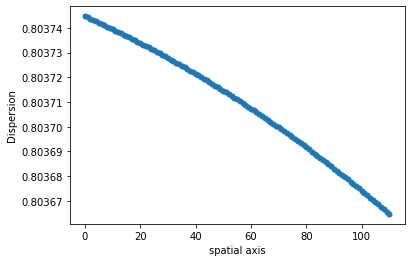

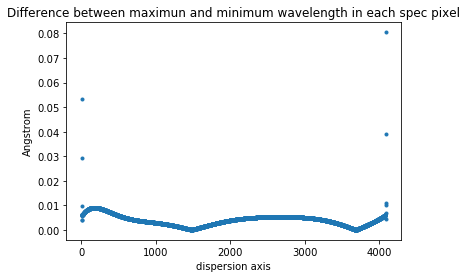

In [6]:
spec.do_waverect(doplot=True)

Profile max value (before normalization) 49.846077


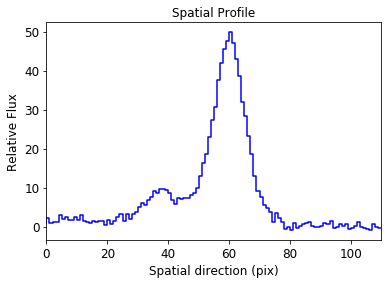

In [7]:
profile = spec.spatial_profile(pixrange=[1700, 2400])


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 2
Number of Moffat profile : 0

Now enter constants of the background polynomial upto degree 0
c0 : 3

Enter parameter values for a Gaussian profile in following format...
amplitude_value, mu_value, sigma_value

Parameters of Gaussian profile 1 : 10, 38, 3

amplitude=10.000000, mu=38.000000, sigma=3.000000

Parameters of Gaussian profile 2 : 50, 62, 4

amplitude=50.000000, mu=62.000000, sigma=4.000000

Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2]
Components: 
    [0]: <Polynomial1D(0, c0=0.75294682)>

    [1]: <Gaussian1D(amplitude=7.98720749, mean=39.49703099, stddev=7.57114804)>

    [2]: <Gaussian1D(amplitude=46.81748647, mean=60.64310588, stddev=5.22087698)>
Parameters:
           c0_0           ampl

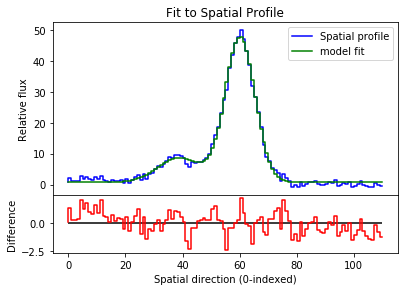

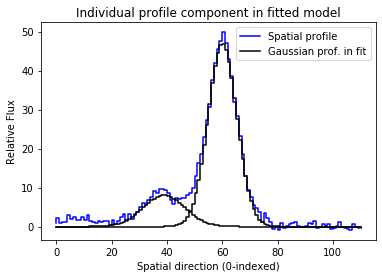

In [8]:
mod = spec.initial_model()

In [9]:
def tie_pos1_gauss(model):
     return model.mean_2 - 21.15
    
def tie_pos2_moffat(model):
    return model.x_0_2 + 14.03

# for two Gaussian and one Moffat  
#mod[1].mean.tied = tie_pos1_moffat 
#mod[2].mean.tied = tie_pos2_moffat 

# for two Gaussian profile
mod[1].mean.tied = tie_pos1_gauss 
#mod[3].mean.tied = tie_pos2_gauss 


Initial model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2]
Components: 
    [0]: <Polynomial1D(0, c0=0.75294682)>

    [1]: <Gaussian1D(amplitude=7.98720749, mean=39.49703099, stddev=7.57114804)>

    [2]: <Gaussian1D(amplitude=46.81748647, mean=60.64310588, stddev=5.22087698)>
Parameters:
           c0_0           amplitude_1    ...       mean_2           stddev_2    
    ------------------ ----------------- ... ----------------- -----------------
    0.7529468187747934 7.987207493502183 ... 60.64310588224692 5.220876981816158

-------------------------------------------


Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2]
Components: 
    [0]: <Polynomial1D(0, c0=0.75285556)>

    [1]: <Gaussian1D(amplitude=7.98781789, mean=39.49288511, stddev=7.56922952)>

    [2]: <Gaussian1D(amplitude=46.81749776, mean=60.64288511, stddev=5.22119066)>
Parame

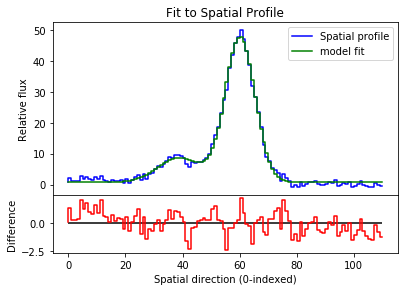

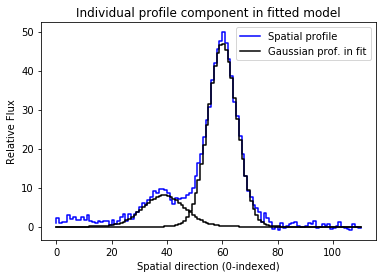

In [10]:
mod_new = spec.refined_model(mod)


Running fit_trace
---------------------------------------------------------
Fitting to the trace at 163 segments
  of the 2D spectrum with stepsize=25 pix ...
    Done
Fitting polynomial of degree 3 to parameter: c0_0
Fitting polynomial of degree 3 to parameter: mean_1
Fitting polynomial of degree 3 to parameter: stddev_1
Fitting polynomial of degree 3 to parameter: mean_2
Fitting polynomial of degree 3 to parameter: stddev_2


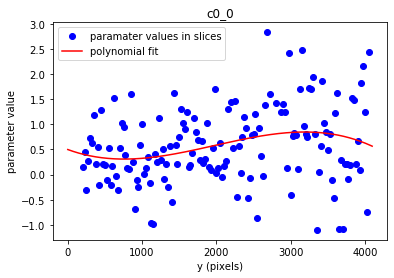

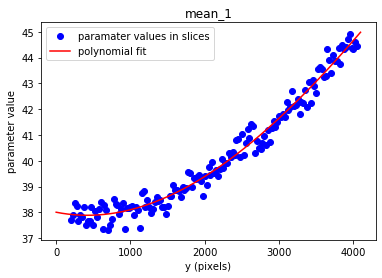

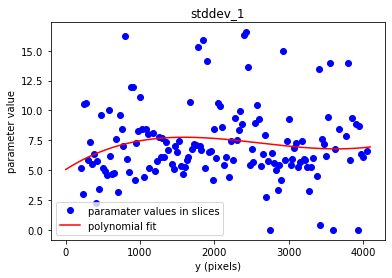

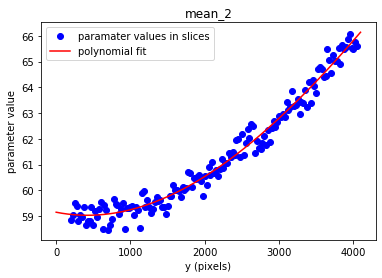

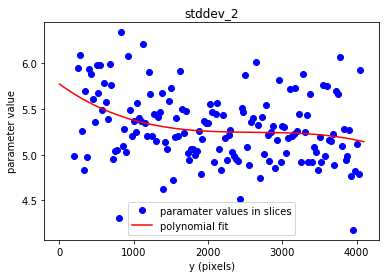

In [11]:
spec.find_and_trace(mod, stepsize=25, fitorder={'stddev_1':3, 'stddev_2':3, 'gamma_2':3, 'alpha_2':3},
                    fitrange=[200,4100])

Fitting to 2 components, plus a background
Extracting the spectrum.  Please be patient
 Extraction range (pixels): 0 - 4096
Fitting to the trace at 4096 segments
  of the 2D spectrum with stepsize=1 pix ...
 Spectrum Start:  5651.94
 Spectrum End:     8927.92
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80

 Spectrum Start:  5651.94
 Spectrum End:     8927.92
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80


Plotting the spectrum


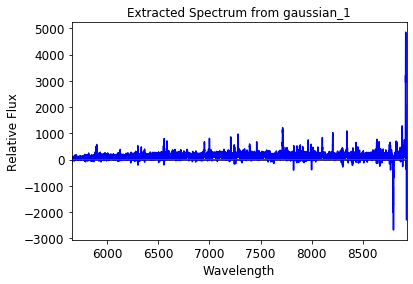

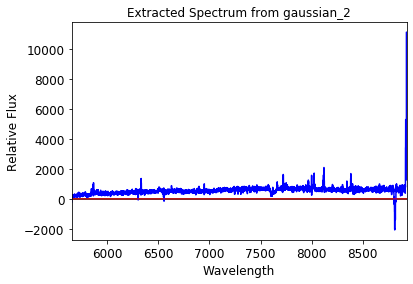

In [12]:
spec.extract(method='modelfit')

In [13]:
wav = spec.spectra[0][1]['wav']
flux = spec.spectra[0][1]['flux']

In [14]:
spec1 = spec1d.Spec1d(wav=wav[0:3090], flux=flux[0:3090])

 Spectrum Start:  5651.94
 Spectrum End:     8123.17
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80



<IPython.core.display.Javascript object>


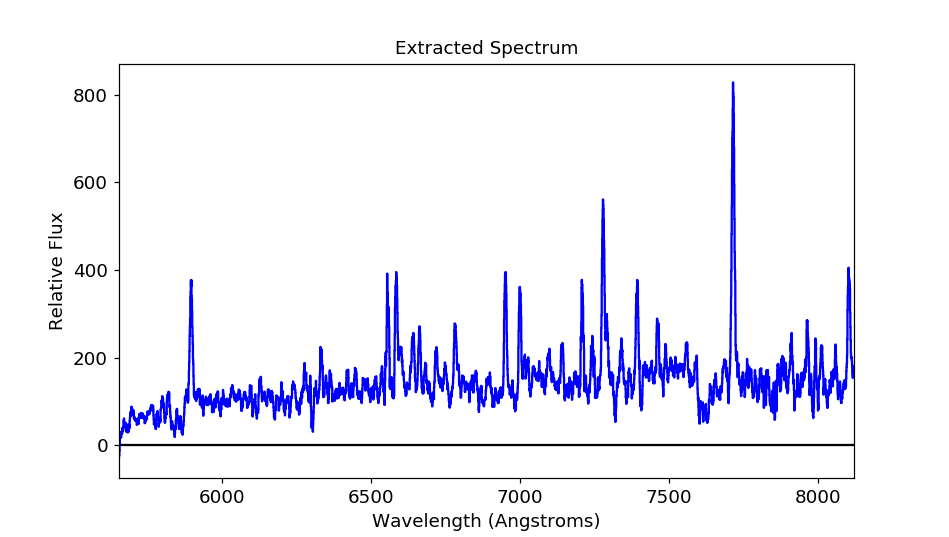

In [18]:
%matplotlib notebook
spec1.smooth(11)

In [19]:
wav = spec.spectra[1][1]['wav']
flux = spec.spectra[1][1]['flux']

In [20]:
spec2 = spec1d.Spec1d(wav=wav[0:3090], flux=flux[0:3090])

 Spectrum Start:  5651.94
 Spectrum End:     8123.17
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80



<IPython.core.display.Javascript object>


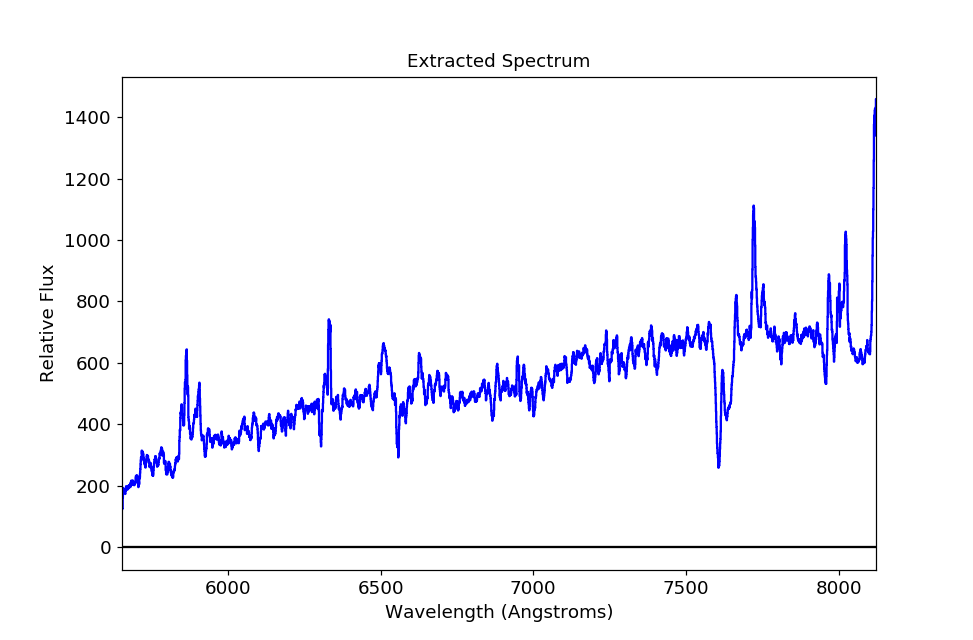

In [22]:
spec2.smooth(11)

In [25]:
inf= '../galaxy_spectra/LRIS_red_data_201213/keck_lris_red_D/Science/spec1d_r201213_0034-MG0751+2716_LRISr_2020Dec13T120424.557.fits'

In [29]:
sp = spec1d.Spec1d(inf, informat='pypeit', trimsec=[0, 4000])


Reading spectrum from ../galaxy_spectra/LRIS_red_data_201213/keck_lris_red_D/Science/spec1d_r201213_0034-MG0751+2716_LRISr_2020Dec13T120424.557.fits
Expected file format: pypeit
 Spectrum Start:  5652.11
 Spectrum End:     8852.21
 Dispersion (1st pixel):   0.77
 Dispersion (average):      0.80



<IPython.core.display.Javascript object>


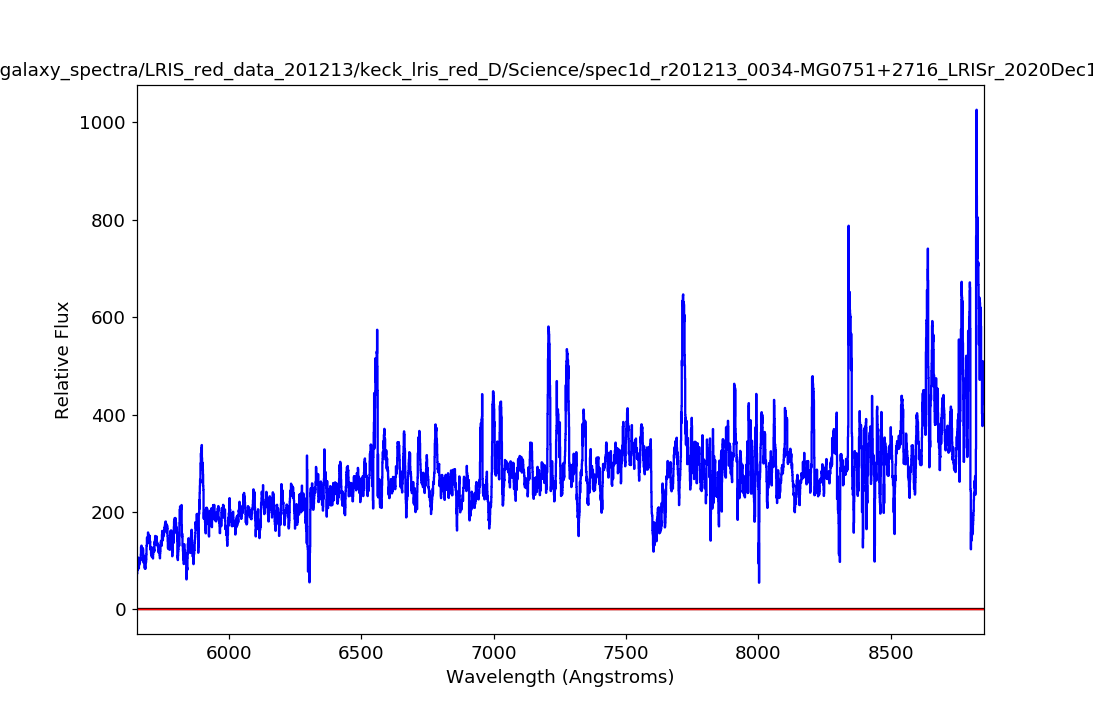

In [30]:
sp.smooth(11)

In [34]:
np.sqrt(1/sp['var'])

51.25751398420482
49.21606906342739
46.87199134661607
45.27624956444519
45.644874255102096
46.01093082667449
42.59284292652346
45.817761408633764
43.82148430216009
44.22730196155293
45.35934096858084
